<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass-Lab  <br>(Week-2-Part-1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (CO<sub>2</sub> emission data)

In the dataset, the CO<sub>2</sub> emission for various regions in the world is given. Our objective is to group the regions based on the factors affecting the environment in terms of the greenhouse gases, where CO<sub>2</sub> is a primary greenhouse gas. 

Many developing and developed countries in the world are contributing to the CO<sub>2</sub> emission in the environment. It is interesting to know that the increase in atmospheric carbon dioxide is responsible for about two-thirds of the total energy imbalance that is causing Earth's temperature to rise and leads to global warming.

**Region**: Region of the country

**CO2 Emission**: Annual CO<sub>2</sub> emission (in tonnes)

**Ease of Business**: The ease of business in the country

**Energy Usage**: Energy used by the country in various forms

**GDP**: GDP of a country

**Internet Usage**: Usage of the internet 

**Population total**: Total population of a country

## Table of Content

1. **[Exploratory Data Analysis](#lib)**
2. **[Hierarchical Clustering](#hie)**


#### Import the required libraries

In [1]:
# import 'numpy' to compute high-level mathematics functions 
import numpy as np

# import 'pandas' to perform data manipulation
import pandas as pd

# import 'matplotlib.pyplot' for visualization
import matplotlib.pyplot as plt

# import 'seaborn' for high-level statistical graphics
import seaborn as sns

# to ignore the warnings run the following code
import warnings
warnings.filterwarnings("ignore")

# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

# to consider the float upto 2 decimals 
pd.options.display.float_format = '{:.2f}'.format

#### Read the data

Load the csv file and print the first five observations.

In [2]:
# read the dataset
df_CO2Emission = pd.read_csv('CO2_emission_data.csv')

# display first five observations using head()
df_CO2Emission.head()

,Region,CO2 Emissions,Ease of Business,Energy Usage,GDP,Internet Usage,Population Total
0,Europe,4294,151,1976,5652325082.00,0.01,3033659
1,Europe,4166,151,2172,7464446950.00,0.02,3014579
2,Europe,4254,151,2172,8376483740.00,0.06,2992724
3,Europe,3865,151,2068,9132562332.00,0.10,2968028
4,Europe,4056,151,2025,10701011856.00,0.15,2940880



### Let's begin with some hands-on practice exercises

<a id="lib"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Identify the different regions to which the countries belong and visualize the count of countries.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# we search for unique regions from the region column
df_CO2Emission.Region.unique()

array(['Europe', 'Africa', 'The Americas', 'Asia', 'Oceania',
       'Middle East'], dtype=object)

**Interpretation:** There are 6 regions in the given data. Now we plot the count of countries in each region.

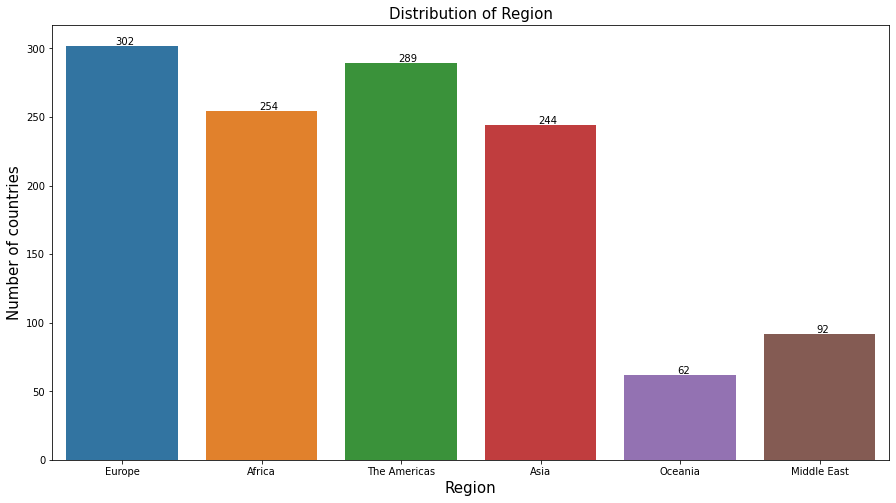

In [4]:
# set the font size using 'figsize'
plt.figure(figsize=(15,8))

# use a countplot to plot the number of countries for each region
sns.countplot(x = df_CO2Emission.Region)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_CO2Emission.Region.value_counts()[0] + 1, s = df_CO2Emission.Region.value_counts()[0])
plt.text(x = 1.98, y = df_CO2Emission.Region.value_counts()[1] + 1, s = df_CO2Emission.Region.value_counts()[1])
plt.text(x = 0.98, y = df_CO2Emission.Region.value_counts()[2] + 1, s = df_CO2Emission.Region.value_counts()[2])
plt.text(x = 2.98, y = df_CO2Emission.Region.value_counts()[3] + 1, s = df_CO2Emission.Region.value_counts()[3])
plt.text(x = 4.98, y = df_CO2Emission.Region.value_counts()[4] + 1, s = df_CO2Emission.Region.value_counts()[4])
plt.text(x = 3.98, y = df_CO2Emission.Region.value_counts()[5] + 1, s = df_CO2Emission.Region.value_counts()[5])

# set plot plot title
# set text size using 'fontsize'
plt.title('Distribution of Region', fontsize = 15)

# set axes labels
# set text size using 'fontsize'
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Number of countries', fontsize = 15)

# display the plot
plt.show()

**Interpretation:**  The maximum number of countries in the data belong to Europian region and the minimum number of countries in the data belong to Oceania.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the datatype, dimension and summary statistics of the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# to check datatype of each variable
df_CO2Emission.dtypes

Region               object
CO2 Emissions         int64
Ease of Business      int64
Energy Usage          int64
GDP                 float64
Internet Usage      float64
Population Total      int64
dtype: object

**Interpretation:** All the variables except `Region` are numerical whereas 'Region' is a categorical variable.

In [6]:
# to check the dimension of data
df_CO2Emission.shape

(1243, 7)

**Interpretation:** There are 1243 observations and 7 variables in the data.

In [7]:
# the 'describe()' returns the statistical summary of data
df_CO2Emission.describe()

,CO2 Emissions,Ease of Business,Energy Usage,GDP,Internet Usage,Population Total
count,1243.00,1243.00,1243.00,1243.00,1236.00,1243.00
mean,189766.62,88.28,75418.42,353554814174.66,0.33,45134936.48
std,769702.72,52.77,270758.65,1358969743285.45,1.63,160048304.35
min,48.00,1.00,30.00,123258507.00,0.00,69660.00
25%,3111.50,45.00,2721.00,7746580674.00,0.06,2097087.50
50%,16208.00,85.00,9318.00,24680372724.00,0.20,7739900.00
75%,75812.00,131.00,34956.50,177000000000.00,0.46,28846635.50
max,8286892.00,186.00,2727728.00,16200000000000.00,57.00,1350695000.00


**Interpretation:** The above summary returns some statistical insights about the data. 

i) The middle 50% of the CO2 emission data is between 3111 tonnes to 75812 tonnes. The standard deviation is 769702 tonnes which is much greater than the mean. This implies there is so much variation in the CO2 emission variable.

ii) The average GDP is near about 35000 crores where the maximum GDP is near about 16200 billions which indicates the developed countries in the corresponding region.  

iii) Maximum the energy usage is near about 27 lac units where maximum total population is 135 crores. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Drop the variables 'Region', 'Ease of Business', 'Internet Usage'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# consider the required variables only 
# pass the list of variables to the drop()
# 'axis = 1' drops the specified column
df_CO2Emission = df_CO2Emission.drop(['Region', 'Ease of Business', 'Internet Usage'], axis = 1)

# to print first five observations 
df_CO2Emission.head()

,CO2 Emissions,Energy Usage,GDP,Population Total
0,4294,1976,5652325082.00,3033659
1,4166,2172,7464446950.00,3014579
2,4254,2172,8376483740.00,2992724
3,3865,2068,9132562332.00,2968028
4,4056,2025,10701011856.00,2940880


**Interpretation:**  The above output shows that we have dropped the variables 'Region', 'Ease of Business', 'Internet Usage'. Now we have 4 variables in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Check if there are missing values, if yes then remove the observations with missing values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# to check for null values and sum them column-wise
total_missings = df_CO2Emission.isnull().sum()
total_missings

CO2 Emissions       0
Energy Usage        0
GDP                 0
Population Total    0
dtype: int64

**Interpretation:**  There are no missing values in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Check if there are outliers in the data and visualize the outliers using a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

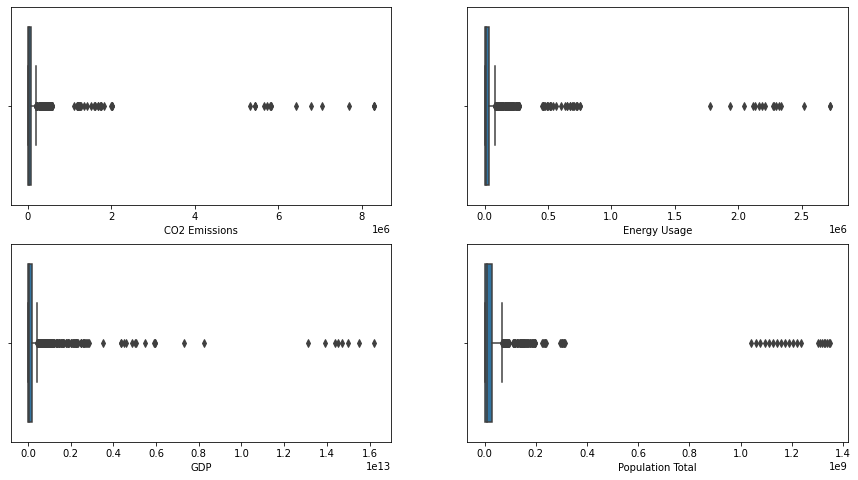

In [10]:
# plot the boxplot for each variable 

# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_CO2Emission.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_CO2Emission[variable], ax = subplot)

# display the plot
plt.show()

**Interpretation:** From the above boxplots, we can see that there are so many outliers present in all the variables. We need to remove them before the further analysis.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Remove the outliers using 3.5IQR and check the shape of the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Generally, we use the 1.5IQR method to remove the outliers. Here, there are some extreme outliers that we need to remove. Thus, we use condition as 3.5IQR.

In [11]:
# calculate the first quartile
Q1 = df_CO2Emission.quantile(0.25)

# calculate the third quartile
Q3 = df_CO2Emission.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-3.5*IQR, Q3+3.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_CO2Emission = df_CO2Emission[~((df_CO2Emission < (Q1 - 3.5 * IQR)) | (df_CO2Emission > (Q3 + 3.5 * IQR))).any(axis=1)]

# check the shape of the data 
df_CO2Emission.shape

(1054, 4)

**Interpretation:**  From the dimension of the data, we can see that there are 1054 observations and 4 variables in the data. We have removed the extreme outliers.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Visualize the data obtained after removing the outliers with the help of a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

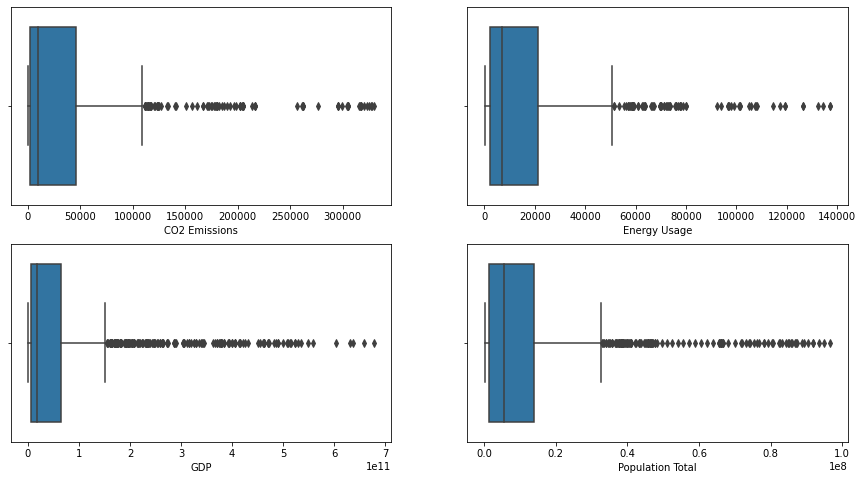

In [12]:
# plot the boxplot for each variables

# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_CO2Emission.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_CO2Emission[variable], ax = subplot)

# display the plot
plt.show()

**Interpretation:**  

i) Observing the range of the boxplot, we can say that the extreme outliers are removed from the original data.

ii) The new 'outliers' that we can see in the variables are moderate outliers that lied within the min/max range before removing the actual outliers.

Now the data is ready for hierarchical clustering.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Transform the variables in the standard form such that they will have mean 0 and standard deviation 1 and get the summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# select the variables for model building and store it in 'features'
features = df_CO2Emission[['CO2 Emissions','Energy Usage','GDP','Population Total']]

# instantiate the 'StandardScaler'
scaler = StandardScaler()

# fit_transform() transforms the data by first computing the mean and sd and later scaling the data
# name the standardized data as 'features_scaled'
features_scaled = scaler.fit_transform(features)

In [14]:
# convert the array back to a dataframe
# pass the required column names to the parameter 'columns'
df_scaled = pd.DataFrame(features_scaled, columns = df_CO2Emission.columns)

# summarize the dataframe
# use 'round()' to consider the integer values
round(df_scaled.describe())

,CO2 Emissions,Energy Usage,GDP,Population Total
count,1054.00,1054.00,1054.00,1054.00
mean,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.00,-1.00,-1.00,-1.00
25%,-1.00,-1.00,-1.00,-1.00
50%,-0.00,-0.00,-0.00,-0.00
75%,0.00,0.00,-0.00,0.00
max,5.00,5.00,5.00,5.00


**Interpretation:** Here all the variables have a mean 0 and standard deviation of 1. Now they are in the standard form. 

<a id="hie"></a>
## 2. Hierarchical Clustering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the 'ward' linkage method and print the first 10 observations of the linkage matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(features_scaled, method = 'ward')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[380.         382.           0.00002257   2.        ]
 [391.         392.           0.00003782   2.        ]
 [381.         383.           0.0000863    2.        ]
 [ 36.          37.           0.00008787   2.        ]
 [ 26.          27.           0.00010737   2.        ]
 [495.         496.           0.00011967   2.        ]
 [384.         385.           0.00012006   2.        ]
 [816.         818.           0.00014106   2.        ]
 [960.         961.           0.00014553   2.        ]
 [389.         390.           0.00014886   2.        ]]


**Interpretation:** 

i) The 1st column and the 2nd column represent observations that are merged together. The distance at which the observations are merged is given in the 3rd column which is used to plot the dendrogram. The 4th column in the linkage matrix is the number of observations in the merged cluster.

ii) Here at the ith iteration, the observations `link_mat[i,0]` and `link_mat[i,1]` are considered to form a cluster n+i (n+i is the index of cluster obtained at ith iteration). A cluster with an index less than n corresponds to one of the original observations. 

iii) Consider the 3rd row in the linkage matrix, here the 1st observation is 381.0 (in the 1st column) and the 2nd observation is 383.0 (in the 2nd column). We merge these two observations to form a cluster and get the linkage distance as 0.000086 (in the 3rd column). Now, there are two obsevations in this newly formed cluster (which is given in the 4th column).

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the clusters obtained using dendrogram and find the optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

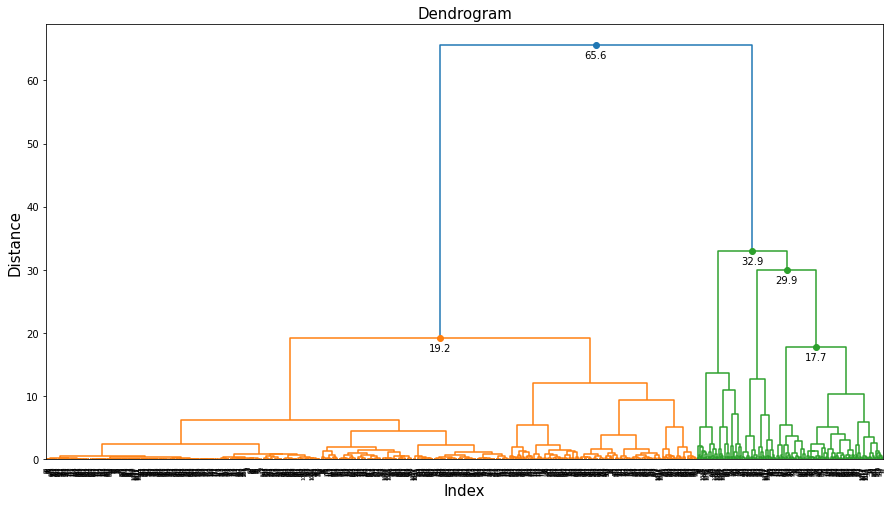

In [16]:
# plot the dendrogram
# set the font size using 'figsize'
plt.figure(figsize=(15,8))

# pass the linkage matrix
dendro = dendrogram(link_mat)

# annotate the distance on the y-axis for distance > 15
# 'dendro' returns the dictionary containing x,y coordinates and the color list for each merge
# the 'icoord' returns the x-coordinates for the rectangle that represents the merging
# the 'dcoord' returns the y-coordinates (distance) for the each corner of the rectangle that represents the merging
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    
    # consider 'x' as the x-coordinate of the average distance on the merging line
    x = sum(i[1:3])/2
    
    # consider 'y' as the distance at which the merging occurs 
    y = d[1]
    
    # pass the if-condition for annotation
    if y > 15:
        
        # plot the bullet and annotate the merging distance 'y'
        plt.plot(x, y, 'o', c=c)
        
        # pass the conditions to annotate the distance
        plt.annotate("%.3g" % y, (x, y), xytext = (0, -5), textcoords = 'offset points', va = 'top', ha = 'center')

# set the plot labels
# set the font size using 'fontsize'
plt.title('Dendrogram', fontsize = 15)

# set axes labels
# set the font size using 'fontsize'
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The dendrogram above shows that the optimal number of clusters is two.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the cophenetic correlation coefficient and interpret it.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# calculate the euclidean distance between the observations 
eucli_dist = euclidean_distances(features_scaled)

# the above code will return the matrix of 1054x1054
# consider only the array of upper triangular matrix
# k=1 considers the upper triangular values without the diagonal elements
dist_array = eucli_dist[np.triu_indices(1054, k = 1)]

# pass the linkage matrix and actual distance
# 1st output of the cophenet() is the correlation coefficient
coeff, cophenet_dist = cophenet(link_mat, dist_array)

# print the cophenetic correlation coefficient
print(coeff)

0.7973822617121825


**Interpretation:** The cophenetic correlation coefficient is 0.80 which is close to 1 which means that the dendrogram is well defined concerning the clusters.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Instantiate clustering method with an optimal number of clusters and 'ward' linkage method.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# agglomerative clustering recursively merges the pair of clusters that minimally increases a given linkage distance.
# instantiate clustering method with 2 clusters and 'ward' linkage method
# ‘ward’ method of linkage minimizes the variance of the clusters that are being merged
clusters = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')

# fit the model on the scaled data
clusters.fit(features_scaled)

AgglomerativeClustering()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Obtain the cluster labels and add a column containing the cluster number to the original data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# add a column containing cluster number to the original data
df_CO2Emission['Cluster'] = clusters.labels_

# print head() of the newly formed dataframe
df_CO2Emission.head()

,CO2 Emissions,Energy Usage,GDP,Population Total,Cluster
0,4294,1976,5652325082.00,3033659,1
1,4166,2172,7464446950.00,3014579,1
2,4254,2172,8376483740.00,2992724,1
3,3865,2068,9132562332.00,2968028,1
4,4056,2025,10701011856.00,2940880,1


**Interpretation:** The observations belonging to the 1st cluster are labeled as 0 and the observations belonging to the 2nd cluster are labeled as 1.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the size of each cluster and plot the count plot for the cluster size.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# check the size of each cluster
df_CO2Emission['Cluster'].value_counts()

1    820
0    234
Name: Cluster, dtype: int64

**Interpretation:** There are 234 observations belonging to the 1st cluster and there are 820 observations the belongs to the 2nd cluster.

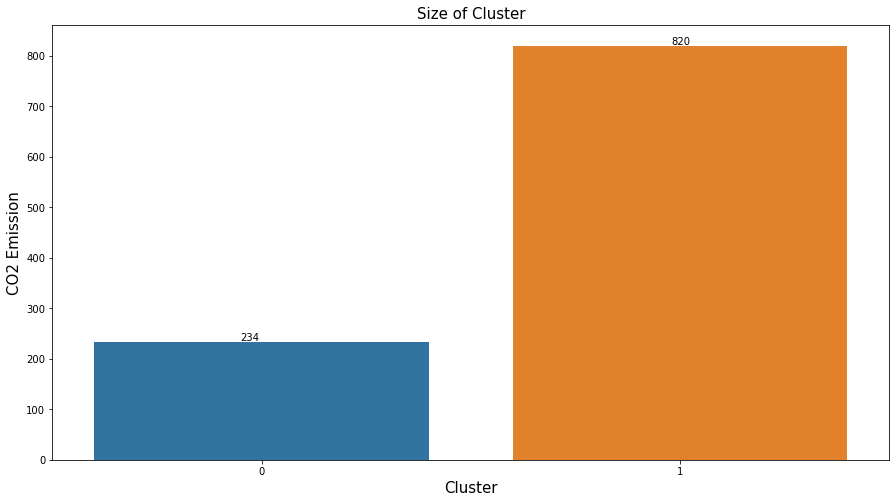

In [21]:
# set the font size using 'figsize'
plt.figure(figsize=(15,8))

# plot the countplot for the cluster size
sns.countplot(data = df_CO2Emission, x = 'Cluster')

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_CO2Emission['Cluster'].value_counts()[0] + 1, s = df_CO2Emission['Cluster'].value_counts()[0])
plt.text(x = 0.98, y = df_CO2Emission['Cluster'].value_counts()[1] + 1, s = df_CO2Emission['Cluster'].value_counts()[1])

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('CO2 Emission', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The maximum number of observations is in the 2nd cluster.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Plot the scatterplot to visualize the clusters using 'CO2 Emissions' and 'Energy Usage'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

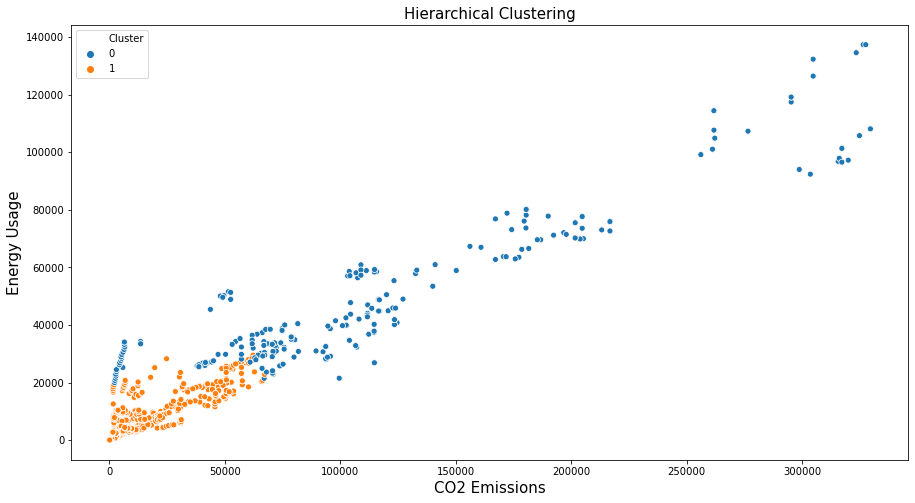

In [22]:
# set the font size using 'figsize'
plt.figure(figsize=(15,8))

# plot the scatterplot to visualize the clusters
# pass the hue parameter to assign different colors to observatiosn in each cluster
sns.scatterplot(x = 'CO2 Emissions', y = 'Energy Usage', data = df_CO2Emission, hue = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('CO2 Emissions', fontsize = 15)
plt.ylabel('Energy Usage', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The above scatterplot shows that two clusters are well-formed. It shows that the majority of the regions in the 1st cluster tend to have maximum CO2 emission and energy usages.
Almost all the regions in the 2nd cluster tend to have minimum CO2 emission and energy usage than those in the 1st cluster.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Obtain the first 10 observations for 1st cluster and find its summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# first 10 observations in the cluster_1
df_CO2Emission[df_CO2Emission.Cluster == 0].head(10)

,CO2 Emissions,Energy Usage,GDP,Population Total,Cluster
8,92533,30698,67863832648.00,33003442,0
9,89493,30974,85324997370.00,33461345,0
10,107128,32335,103000000000.00,33960903,0
11,103963,34658,117000000000.00,34507214,0
12,112339,36793,135000000000.00,35097043,0
13,114619,37425,171000000000.00,35725377,0
14,124586,40823,137000000000.00,36383302,0
15,123475,40105,161000000000.00,37062820,0
16,123475,41852,199000000000.00,37762962,0
17,123475,41852,204000000000.00,38481705,0


**Interpretation:** The above output shows the first ten observations belonging to the 1st cluster.

In [24]:
# statistical summary of the variables
df_CO2Emission[df_CO2Emission.Cluster==0].describe()

,CO2 Emissions,Energy Usage,GDP,Population Total,Cluster
count,234.00,234.00,234.00,234.00,234.00
mean,114965.60,49870.94,236719737453.08,32435995.82,0.00
std,83140.40,26678.21,153080153053.87,26770777.97,0.00
min,2226.00,19971.00,7707034813.00,1359114.00,0.00
25%,63767.50,30598.25,130000000000.00,9097401.75,0.00
50%,95160.50,39972.50,205000000000.00,27516491.00,0.00
75%,159756.50,62885.75,341500000000.00,45853665.25,0.00
max,329605.00,137343.00,678000000000.00,96706764.00,0.00


**Interpretation:**

i) The average CO2 emission is about 114965 tonnes for the countries in the regions where the average GDP is 23671 crores. 

ii) The average energy usage is near about 49 thousand units where the maximum population is 9 crores. 

iii) In the regions where there are developed countries, we generally observe high GDP and CO2 emission.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Obtain the first 10 observations for the 2nd cluster and find its summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# first 10 observations in the cluster_2
df_CO2Emission[df_CO2Emission.Cluster == 1].head(10)

,CO2 Emissions,Energy Usage,GDP,Population Total,Cluster
0,4294,1976,5652325082.00,3033659,1
1,4166,2172,7464446950.00,3014579,1
2,4254,2172,8376483740.00,2992724,1
3,3865,2068,9132562332.00,2968028,1
4,4056,2025,10701011856.00,2940880,1
5,4129,2061,12881352688.00,2912559,1
6,3880,2068,12044212904.00,2884303,1
7,4283,2059,11926953259.00,2856673,1
18,9065,9004,14188949240.00,15421075,1
19,18793,9676,19640862550.00,15976715,1


**Interpretation:** The above output shows the first ten observations belonging to the 2nd cluster.

In [26]:
# statistical summary of the variables
df_CO2Emission[df_CO2Emission.Cluster== 1].describe()

,CO2 Emissions,Energy Usage,GDP,Population Total,Cluster
count,820.00,820.00,820.00,820.00,820.00
mean,12706.83,6355.90,22616353698.80,6981026.71,1.00
std,15888.05,6865.60,32445483084.99,9259193.28,0.00
min,48.00,30.00,123258507.00,69660.00,1.00
25%,1503.00,758.50,3407603301.50,765673.75,1.00
50%,5865.50,3917.00,11478683633.50,3684119.00,1.00
75%,18806.00,9156.25,26144480318.25,9407481.50,1.00
max,67242.00,29501.00,203000000000.00,52487293.00,1.00


**Interpretation:** 

i) From the above output we can observe that the average CO2 emission is near about 12706 tonnes for the regions where the average GDP is 2261 crore. 

ii) The middle 50% of the energy usage is between 758 to 9156 units.

iii) In the regions with the developing countries, we generally observe low GDP and CO2 emission.